In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [25]:
#Loading in the data
data = pd.read_csv('Concrete_Data.csv',sep=';')

#adjusting the names of the columns in the datatset
data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement', 
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate', 
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ':'compressive_strength'
}, inplace=True)

#looking at it
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


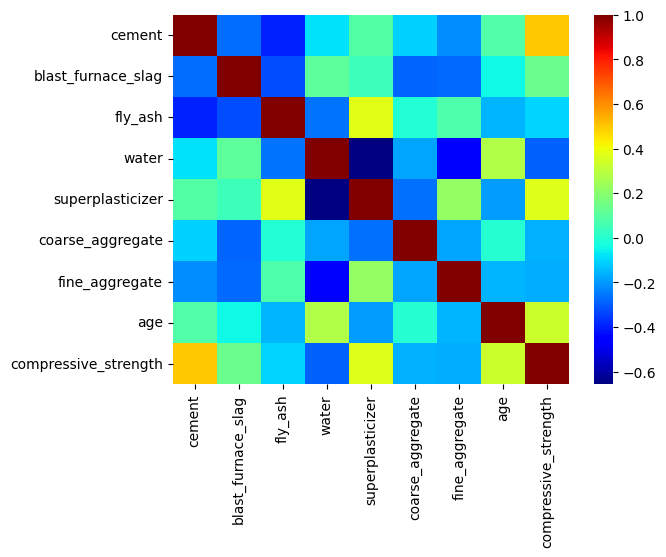

In [26]:
#Plotting a heatmap to show the correlation between the features
plt.figure
sns.heatmap(data.corr(),cmap = 'jet')
#plt.tight_layout()
plt.show()

In [35]:
Y = data.compressive_strength #dependant variable
X = data.loc[:,:"age"] #independant variables

X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [36]:
scaler = StandardScaler().fit(X) #Initialize a StandardScaler instance and fit it to the dataset X
data_scaled = scaler.transform(X) # Apply the scaler to the data (standardize the features in X) 
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)#Convert the scaled data back into a dataframe of the same structure
data_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


# PCA

In [37]:
pca = PCA().fit(data_scaled) #PCA instance and fit it to the scaled data

# Create a dataframe of the eigenvectors
pca_eigen = pd.DataFrame(
    pca.components_.T,  #Transpose to get features as rows and components as columns
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],  #Name principal components
    index=data_scaled.columns  #original feature names as the index
)

# Compute the loadings
pca_data = pd.DataFrame()
pca_data["PC"] = pca_eigen.columns 
pca_data["Explained Variance"] = pca.explained_variance_  # Explained variance for each PC
pca_data["Explained Variance Ratio"] = pca.explained_variance_ratio_  #ratio of explained variance for each PC
pca_data.set_index('PC')  #'PC' as the index of the DataFrame

# Compute the PCA scores
pca_scores = pd.DataFrame(
    pca.transform(data_scaled),  #Transform the scaled data to get scores
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],  
    index=data_scaled.index  #Retain the original index for the data
)


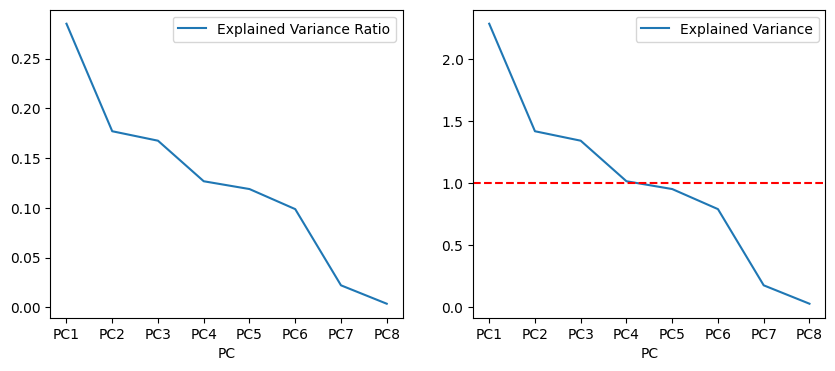

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
axs = axs.ravel()

pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])
pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])
plt.axhline(y=1, color='r', linestyle='--')

/tmp/ipykernel_450/2767668448.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC1"][i],
/tmp/ipykernel_450/2767668448.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC2"][i],


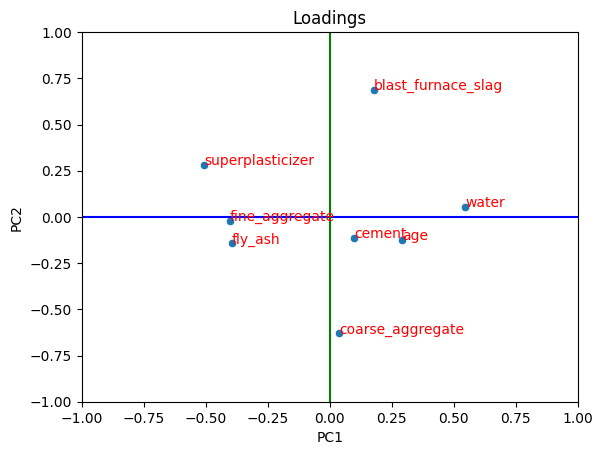

In [39]:
# Plot the loadings
sns.scatterplot(data=pca_eigen, x="PC1", y="PC2")
plt.title('Loadings')
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot annotations
for i in range(pca_eigen.shape[0]):
    plt.text(
        pca_eigen["PC1"][i],
        pca_eigen["PC2"][i],
        pca_eigen.index[i],
        color="red",
    )

plt.show() 

## LDA

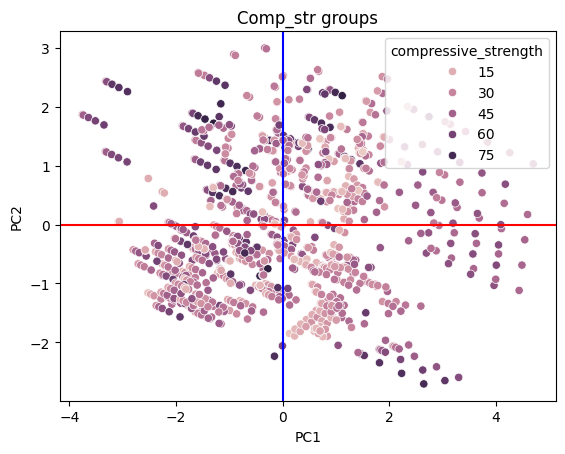

In [52]:
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y)
plt.title('Comp_str groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

In [51]:
values = Y.describe().T

compressive_str25 = 23.710
compressive_str50 = 34.445
compressive_str75 = 46.135

values

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: compressive_strength, dtype: float64

In [54]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: compressive_strength, Length: 1030, dtype: float64

79.99 --- Strong
61.89 --- Strong
40.27 ---Super weak
41.05 ---Super weak
44.3 ---Super weak
47.03 --- Strong
43.7 ---Super weak
36.45 ---Super weak
45.85 ---Super weak
39.29 ---Super weak
38.07 ---Super weak
28.02 ---Super weak
43.01 ---Super weak
42.33 ---Super weak
47.81 --- Strong
52.91 --- Strong
39.36 ---Super weak
56.14 --- Strong
40.56 ---Super weak
42.62 ---Super weak
41.84 ---Super weak
28.24 ---Super weak
8.06 ---Super weak
44.21 ---Super weak
52.52 --- Strong
53.3 --- Strong
41.15 ---Super weak
52.12 --- Strong
37.43 ---Super weak
38.6 ---Super weak
55.26 --- Strong
52.91 --- Strong
41.72 ---Super weak
42.13 ---Super weak
53.69 --- Strong
38.41 ---Super weak
30.08 ---Super weak
37.72 ---Super weak
42.23 ---Super weak
36.25 ---Super weak
50.46 --- Strong
43.7 ---Super weak
39.0 ---Super weak
53.1 --- Strong
41.54 ---Super weak
35.08 ---Super weak
15.05 ---Super weak
40.76 ---Super weak
26.26 ---Super weak
32.82 ---Super weak
39.78 ---Super weak
46.93 --- Strong
33.12 ---Supe

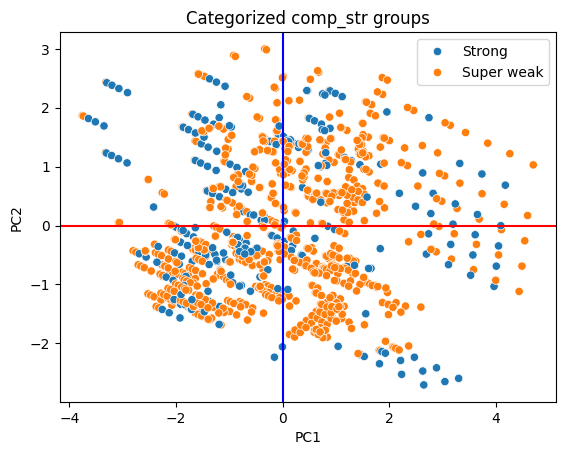

In [57]:
Y_labeled = []

for var in Y:  # Label the data according to compressive strength
    if var > compressive_str75:
        Y_labeled.append("Strong")
    elif compressive_str75 <= var <= compressive_str50:
        Y_labeled.append("Average")
    elif compressive_str50 <= var <= compressive_str25:
        Y_labeled.append("Weak")
    elif var < compressive_str25:
        Y_labeled.append("Super weak")

#plot it again in the same fashion
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y_labeled)
plt.title('Categorized comp_str groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()